### This was made by Mikolaj Jodlowski

Columns in the dataset: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


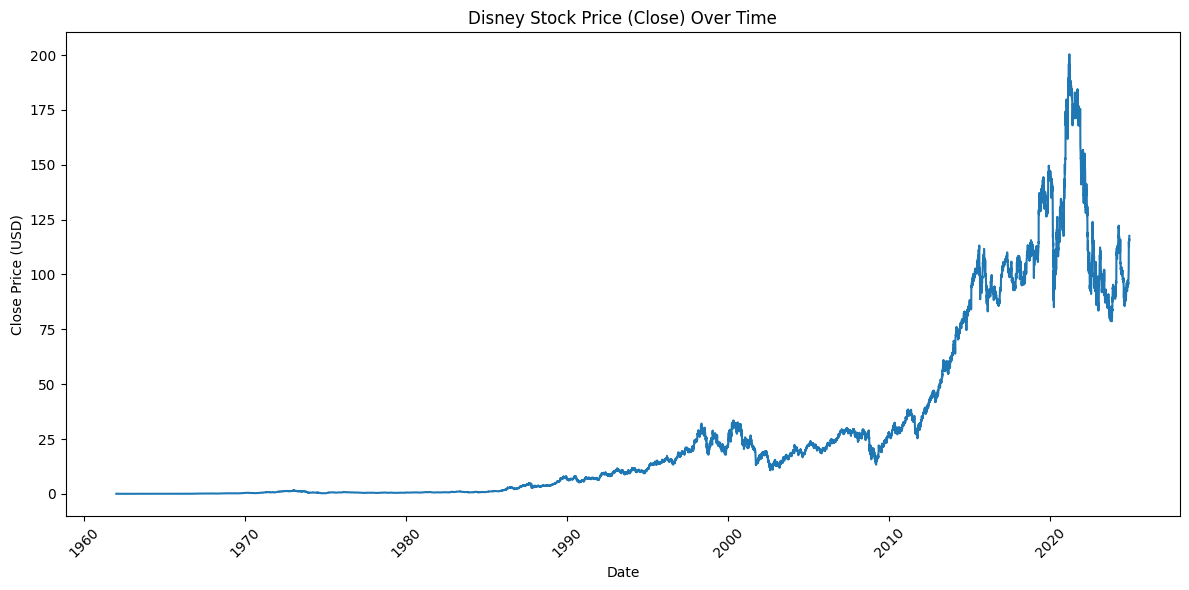

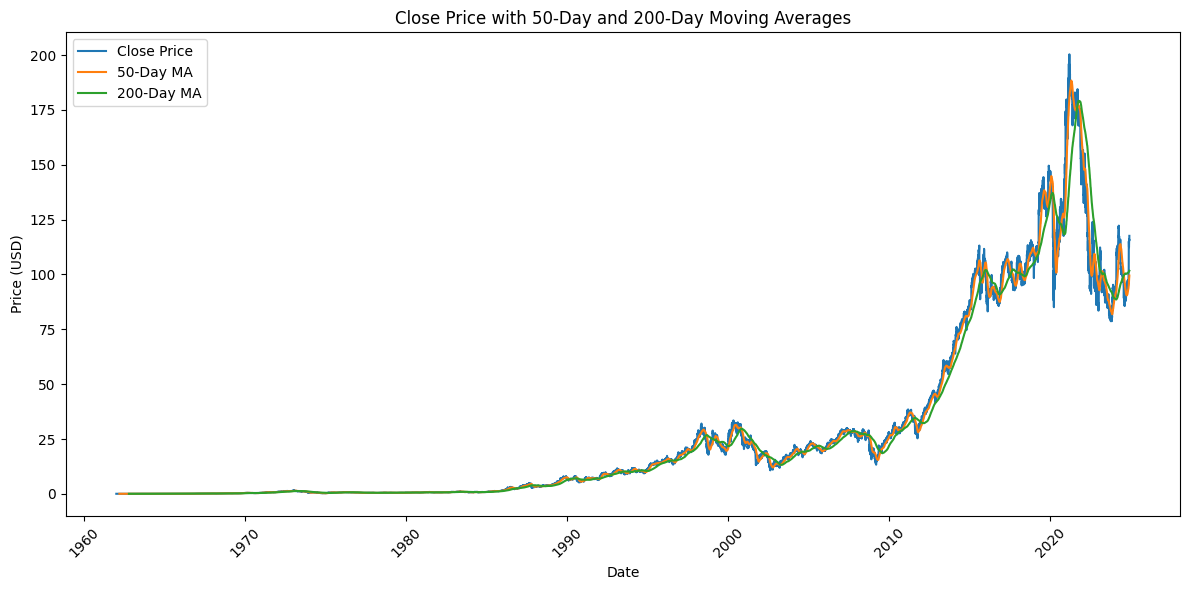

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'datasets/disney_daily.csv' 
data = pd.read_csv(file_path)

# Checking column names
print("Columns in the dataset:", data.columns)

# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', utc=True).dt.tz_localize(None)

# Dropping rows with missing 'Close' values to avoid plotting issues
data = data.dropna(subset=['Close'])

# Plotting the entire dataset's close prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=data)
plt.title('Disney Stock Price (Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating 50-day and 200-day moving averages
data['50-Day MA'] = data['Close'].rolling(window=50).mean()  # 50-day moving average
data['200-Day MA'] = data['Close'].rolling(window=200).mean()  # 200-day moving average

# Plotting close prices with moving averages
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=data, label='Close Price')
sns.lineplot(x='Date', y='50-Day MA', data=data, label='50-Day MA')
sns.lineplot(x='Date', y='200-Day MA', data=data, label='200-Day MA')
plt.title('Close Price with 50-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


First chart shows all time stock prices for Disney.

Second chart shows 50 day moving average that displays short term trends, and shows 200 day average that displays long term trends. We can see that from 2009 until 2020 stock grew significantly, with the 50 day average staying above the 200 day average. In 2020 the 50 day average dropped wichs signalizes decline, however after 2022 the averages are closer so the stock stabilized.  

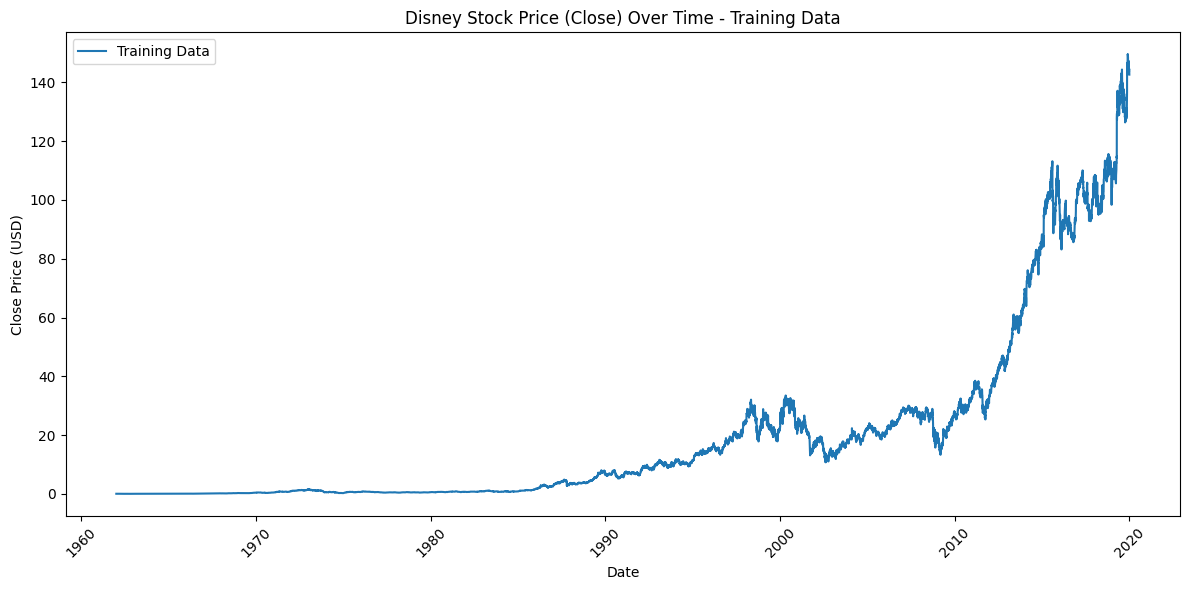

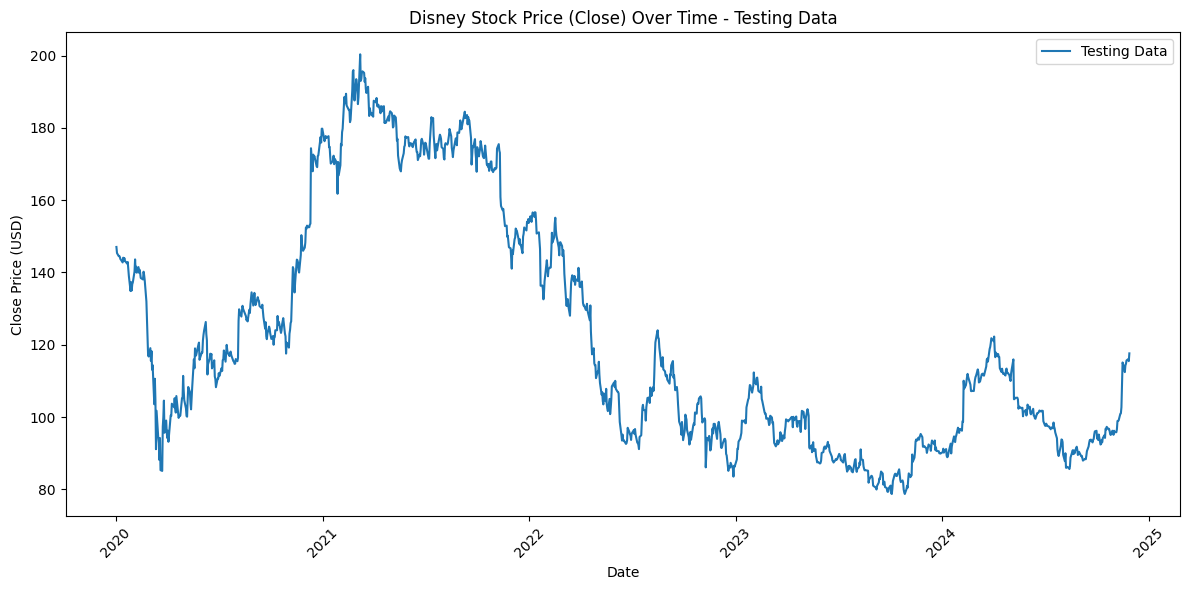

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

training_file_path = 'datasets/training_disney.csv'  
training_data = pd.read_csv(training_file_path)
testing_file_path = 'datasets/testing_disney.csv'  
testing_data = pd.read_csv(testing_file_path)
testing_data['Date'] = pd.to_datetime(testing_data['Date'], errors='coerce', utc=True).dt.tz_localize(None)
training_data['Date'] = pd.to_datetime(training_data['Date'], errors='coerce', utc=True).dt.tz_localize(None)

# plotting the training dataset's close prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=training_data, label='Training Data')
plt.title('Disney Stock Price (Close) Over Time - Training Data')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# plotting the testing dataset's close prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=testing_data, label='Testing Data')
plt.title('Disney Stock Price (Close) Over Time - Testing Data')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The training data contains the data that grows steady until 2000s when it grows after 2010. The testing data has a peak in 2021 followed by a decline and stabilization.